In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# отключим предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
%pylab inline
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm # pip install tqdm – замер времени выполнения итераций цикла
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('data_1.csv')

In [4]:
holdout = pd.read_csv('data_holdout.csv')

In [5]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,861799,M,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,...,25.84,107.50,830.9,0.1257,0.1997,0.2846,0.14760,0.2556,0.06828,NaN
1,8611161,B,13.34,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.06987,...,23.19,96.66,614.9,0.1536,0.4791,0.4858,0.17080,0.3527,0.10160,NaN
2,8510653,B,13.08,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,20.49,96.09,630.5,0.1312,0.2776,0.1890,0.07283,0.3184,0.08183,NaN
3,884448,B,13.20,17.43,84.13,541.6,0.07215,0.04524,0.04336,0.01105,...,27.82,88.28,602.0,0.1101,0.1508,0.2298,0.04970,0.2767,0.07198,NaN
4,911391,B,10.88,15.62,70.41,358.9,0.10070,0.10690,0.05115,0.01571,...,19.35,80.78,433.1,0.1332,0.3898,0.3365,0.07966,0.2581,0.10800,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,8611555,M,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,...,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.28670,0.2355,0.10510,NaN
405,855138,M,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,...,26.02,107.30,740.4,0.1610,0.4225,0.5030,0.22580,0.2807,0.10710,NaN
406,88995002,M,20.73,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.08646,...,47.16,214.00,3432.0,0.1401,0.2644,0.3442,0.16590,0.2868,0.08218,NaN
407,85382601,M,17.02,23.98,112.80,899.3,0.11970,0.14960,0.24170,0.12030,...,32.09,136.10,1344.0,0.1634,0.3559,0.5588,0.18470,0.3530,0.08482,NaN


Характеристики вычисляются из оцифрованного изображения тонкой иглой аспирации (FNA) новообразования груди. Они описывают характеристики ядер клеток, представленных на изображени. Т.е на основе изображение определить качество опухоли.

1) ID
2) Diagnosis (M = malignant/злокачественный, B = benign/доброкачественная)-диагноз по опухоли
3-32)

Для каждого ядра клетки вычисляются десять характеристик с действительным знаком:

a) radius (среднее расстояние от центра до точек по периметру)

b) texture (стандартное отклонение значений шкалы серого)

c) perimeter(периметр)

d) area(площадь)

e) smoothness (локальное изменение длины радиуса)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (выраженность вогнутых участков контура)

h) concave points (количество вогнутых участков контура)

i) symmetry(симметричность)

j) fractal dimension ("пограничное приближение" - 1)/фрактальная размерность

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,4.090000e+02,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,...,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,0.0
mean,3.308070e+07,14.155501,19.221565,92.119389,658.415159,0.096399,0.103560,0.088074,0.048762,0.181761,...,25.538582,107.482127,888.410758,0.132031,0.249503,0.267427,0.113572,0.289254,0.083249,NaN
std,1.323928e+08,3.550507,4.253156,24.488266,355.047215,0.014399,0.052914,0.080324,0.039121,0.028153,...,6.097365,33.686423,577.160406,0.023499,0.151940,0.205450,0.066074,0.062343,0.017998,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.711490e+05,11.690000,16.070000,74.870000,417.200000,0.085880,0.063760,0.027120,0.020080,0.161600,...,20.790000,83.850000,508.900000,0.115700,0.141500,0.108900,0.063160,0.248800,0.070810,NaN
50%,9.056860e+05,13.400000,18.770000,86.490000,552.400000,0.095920,0.088900,0.059880,0.033700,0.179200,...,25.260000,97.900000,686.500000,0.131200,0.211700,0.226000,0.098510,0.282700,0.078630,NaN
75%,8.910499e+06,16.070000,21.590000,105.100000,800.000000,0.105400,0.130600,0.127200,0.073400,0.196600,...,29.430000,127.100000,1124.000000,0.146000,0.333100,0.378600,0.160700,0.318400,0.091360,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,0.937900,1.252000,0.291000,0.663800,0.173000,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       409 non-null    int64  
 1   diagnosis                409 non-null    object 
 2   radius_mean              409 non-null    float64
 3   texture_mean             409 non-null    float64
 4   perimeter_mean           409 non-null    float64
 5   area_mean                409 non-null    float64
 6   smoothness_mean          409 non-null    float64
 7   compactness_mean         409 non-null    float64
 8   concavity_mean           409 non-null    float64
 9   concave points_mean      409 non-null    float64
 10  symmetry_mean            409 non-null    float64
 11  fractal_dimension_mean   409 non-null    float64
 12  radius_se                409 non-null    float64
 13  texture_se               409 non-null    float64
 14  perimeter_se             4

In [8]:
data.shape

(409, 33)

In [9]:
data = data.drop('Unnamed: 32', 1)

In [10]:
data = data.drop('id', 1)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

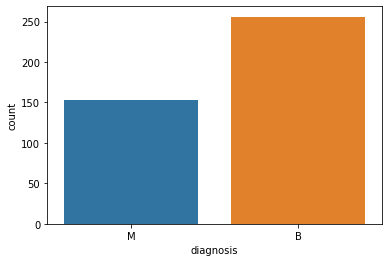

In [11]:
sns.countplot(x="diagnosis",data=data)

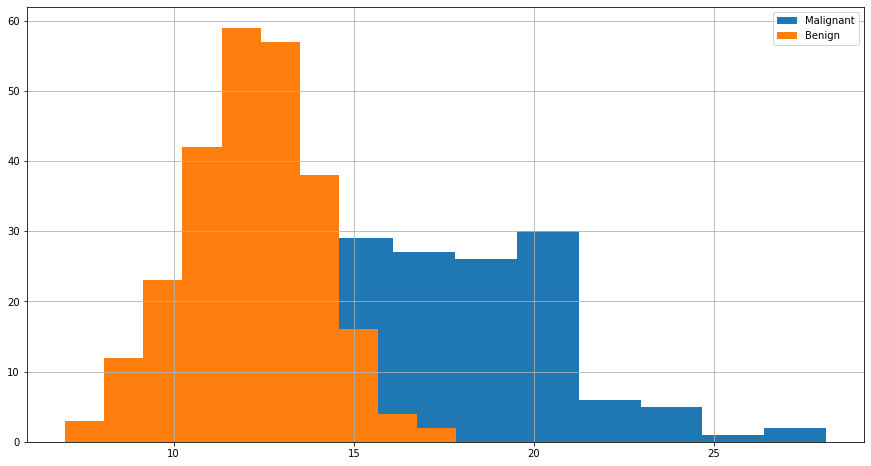

In [12]:
data[data['diagnosis'] == 'M']['radius_mean'].hist(figsize = (15, 8), label = 'Malignant')
data[data['diagnosis'] == 'B']['radius_mean'].hist(figsize = (15, 8), label = 'Benign')
plt.legend()

It is quite clear and quite obvious that the distribution for the 'Malignant' cases is skewed far more right than that for the 'Benign' cases. The mean of the radius mean of the 'Malignant' cases are thus, understandably so, outdoes its 'Benign' counterpart

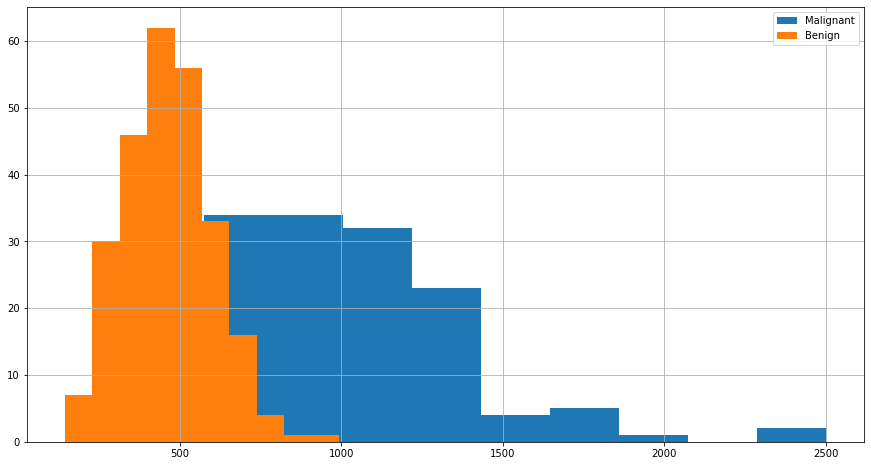

In [13]:
data[data['diagnosis'] == 'M']['area_mean'].hist(figsize = (15, 8), label = 'Malignant')
data[data['diagnosis'] == 'B']['area_mean'].hist(figsize = (15, 8), label = 'Benign')
plt.legend()

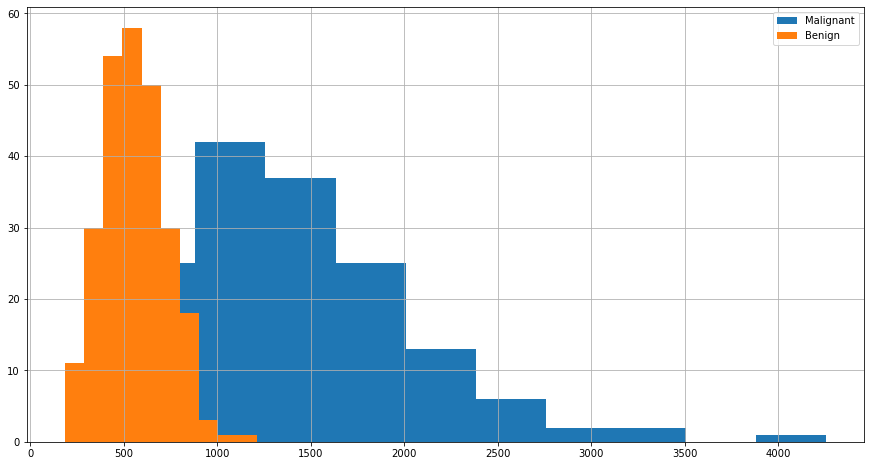

In [14]:
data[data['diagnosis'] == 'M']['area_worst'].hist(figsize = (15, 8), label = 'Malignant')
data[data['diagnosis'] == 'B']['area_worst'].hist(figsize = (15, 8), label = 'Benign')
plt.legend()

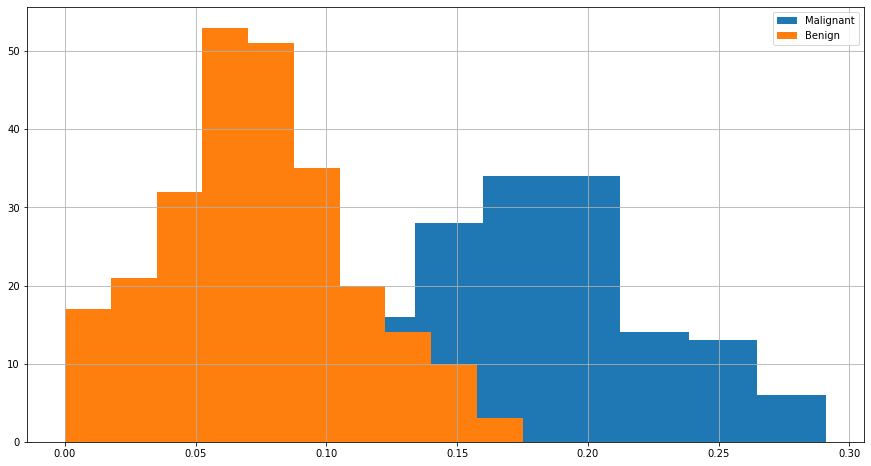

In [15]:
data[data['diagnosis'] == 'M']['concave points_worst'].hist(figsize = (15, 8), label = 'Malignant')
data[data['diagnosis'] == 'B']['concave points_worst'].hist(figsize = (15, 8), label = 'Benign')
plt.legend()

<Figure size 720x720 with 0 Axes>

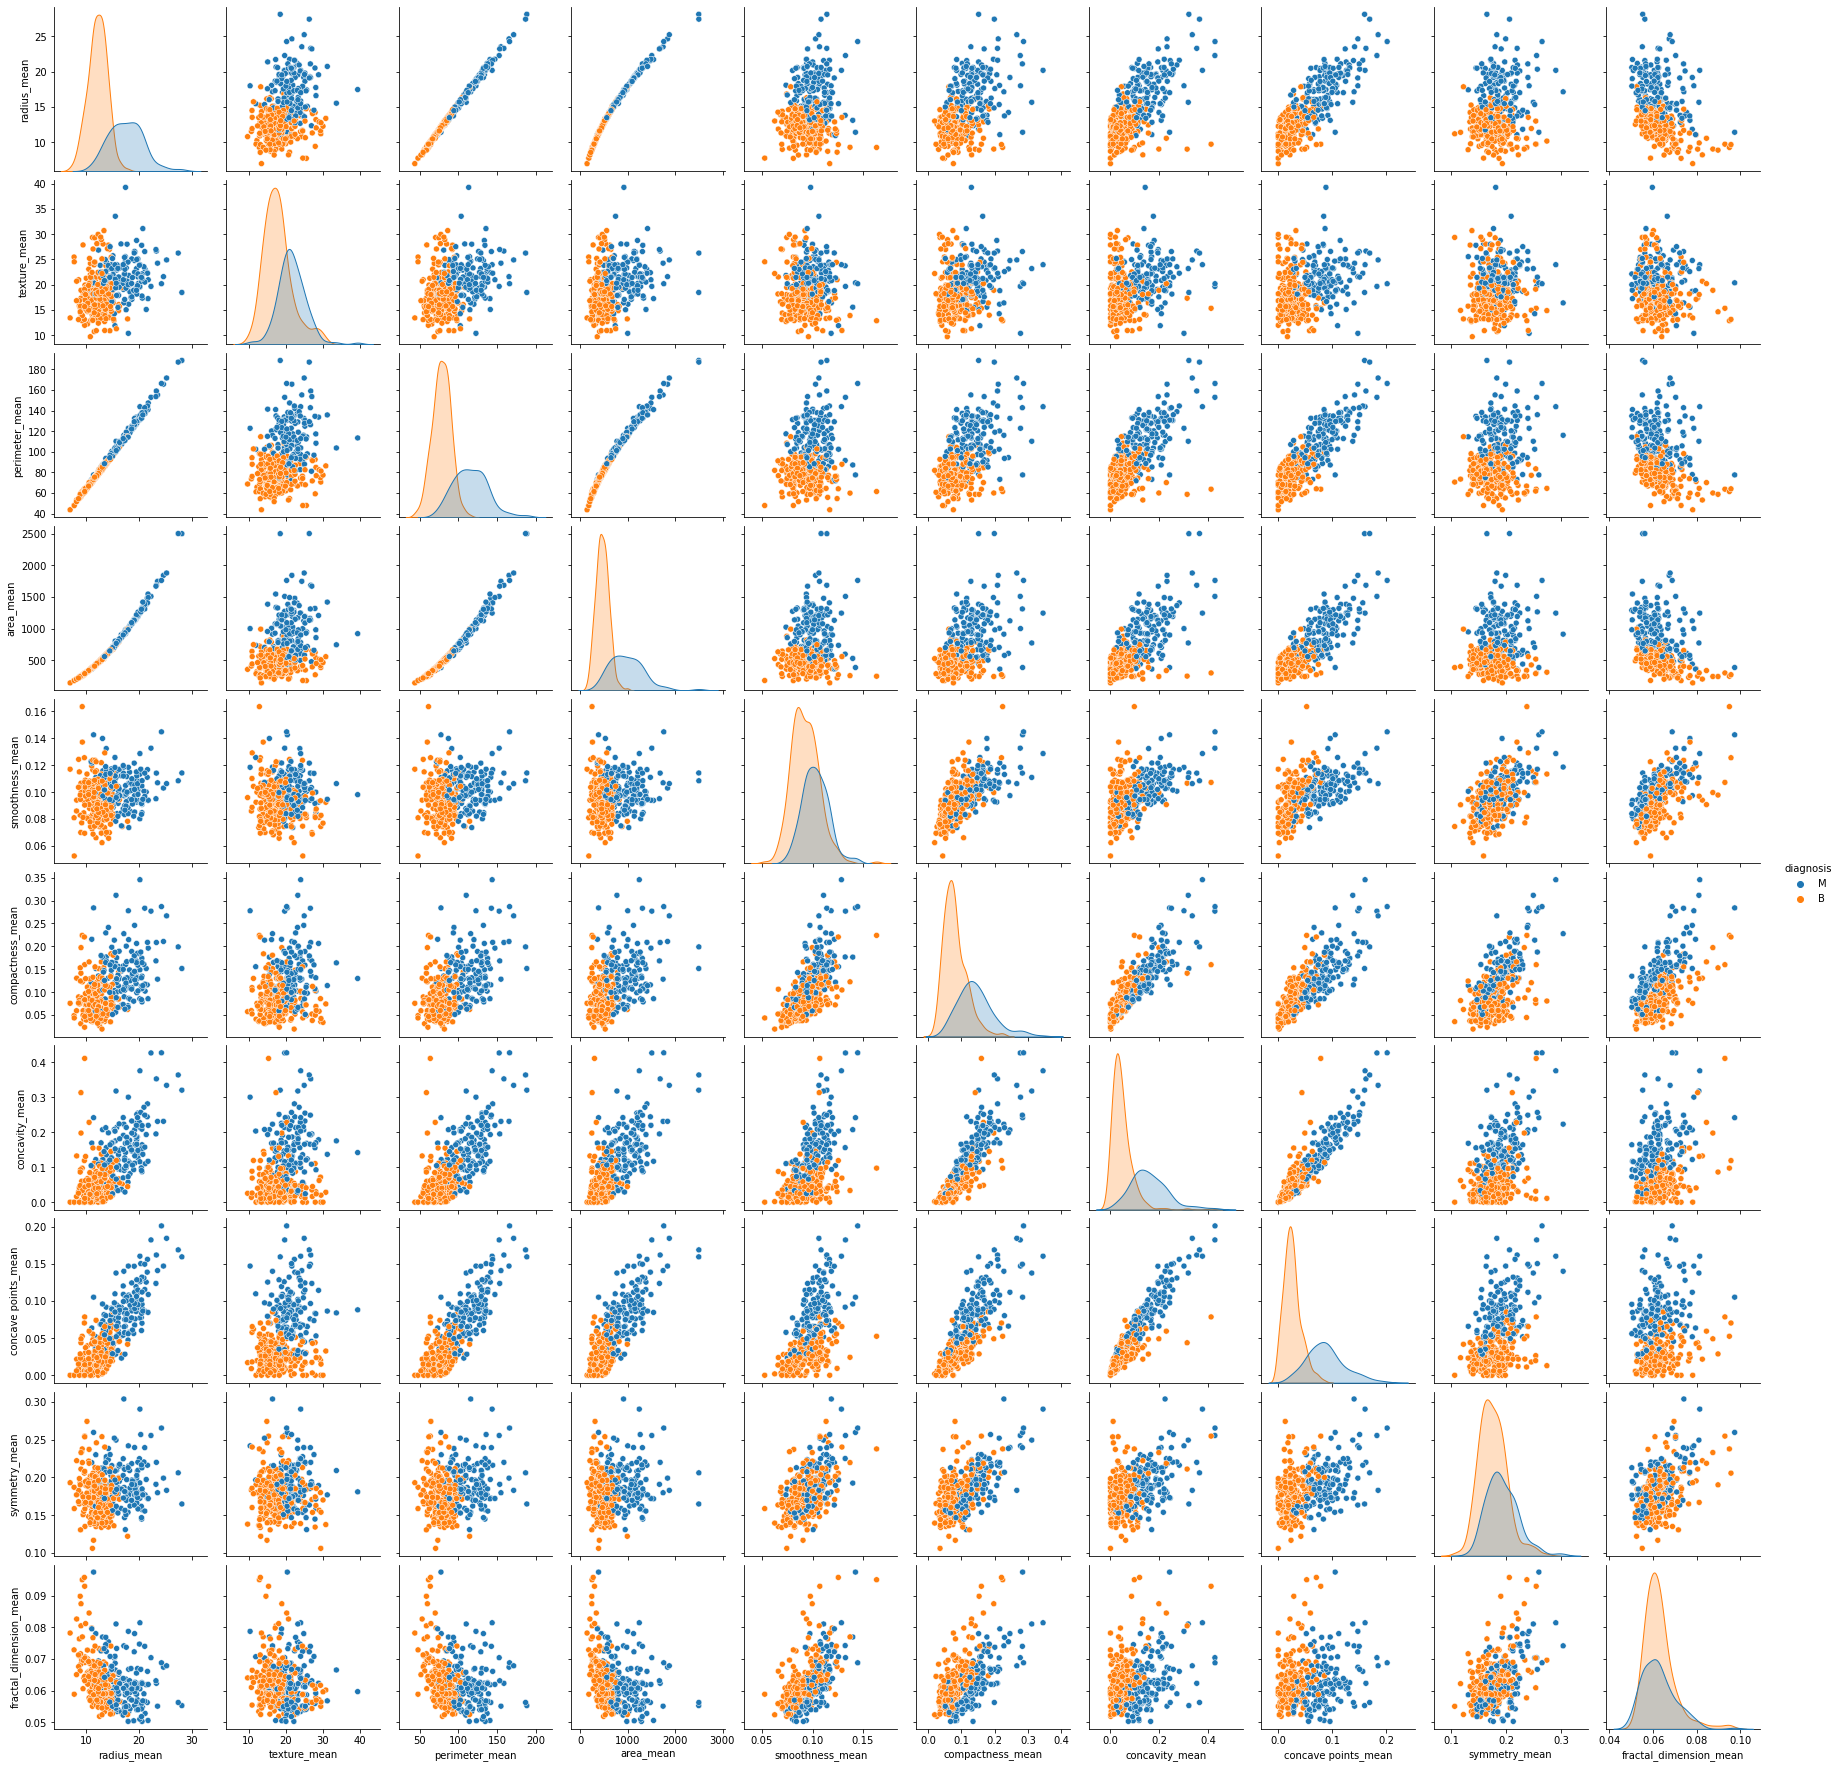

In [16]:
cols=['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
plt.figure(figsize=(10,10))
sns.pairplot(data=data[cols],hue='diagnosis')

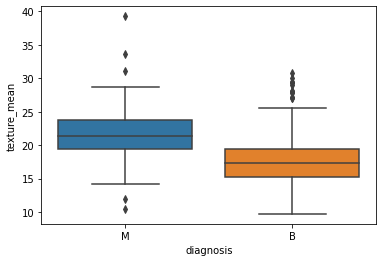

In [17]:
sns.boxplot(x=data.diagnosis,y=data.texture_mean,data=data)
plt.show()

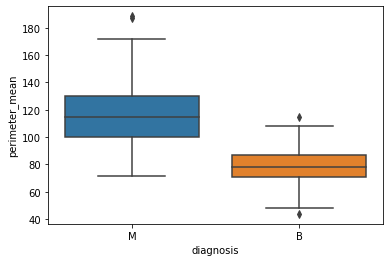

In [18]:
sns.boxplot(x=data.diagnosis,y=data.perimeter_mean,data=data)
plt.show()

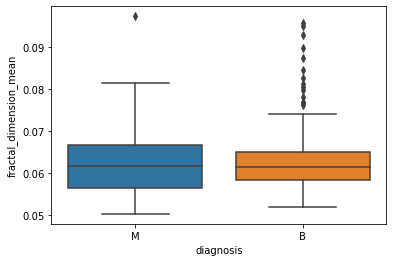

In [19]:
sns.boxplot(x=data.diagnosis,y=data.fractal_dimension_mean,data=data)
plt.show()

In [20]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

In [21]:
X = data
# .drop('diagnosis', 1)

In [22]:
y = data['diagnosis']

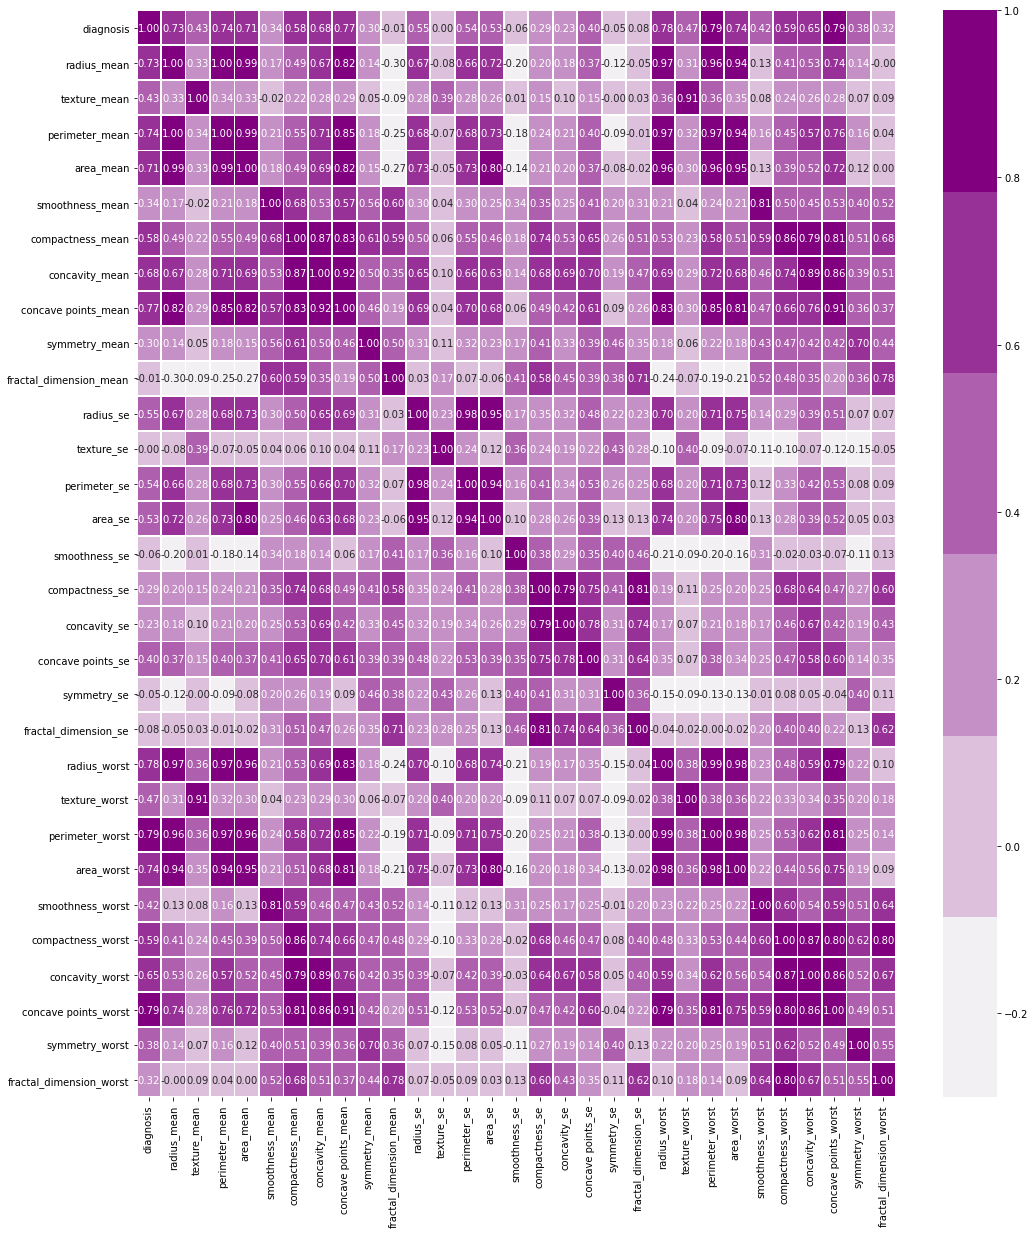

In [23]:
corr_matrix = X.corr()
pyplot.figure(figsize=(17, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=.9, cmap=sns.light_palette("purple"));

In [24]:
X = X.drop('radius_mean', 1)
X = X.drop('diagnosis', 1)

In [25]:
X = X.drop('texture_worst', 1)
X = X.drop('perimeter_mean', 1)
X = X.drop('perimeter_worst', 1)
X = X.drop('radius_worst', 1)
X = X.drop('area_worst', 1)
X = X.drop('perimeter_se', 1)
X = X.drop('radius_se', 1)
X = X.drop('concave points_worst', 1)
X = X.drop('texture_se', 1)
X = X.drop('area_se', 1)
X = X.drop('smoothness_se', 1)
X = X.drop('compactness_se', 1)
X = X.drop('concavity_se', 1)
X = X.drop('concave points_se', 1)
X = X.drop('symmetry_se', 1)
X = X.drop('smoothness_worst', 1)
X = X.drop('fractal_dimension_se', 1)
X = X.drop('compactness_worst', 1)
X = X.drop('concavity_worst', 1)
X = X.drop('symmetry_worst', 1)
X = X.drop('fractal_dimension_worst', 1)

In [26]:
X.columns

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean'],
      dtype='object')

In [27]:
for i in X.columns:
    print(i)
    print(X[np.abs(X[i]-X[i].mean()) > (3*X[i].std())][i].count())

texture_mean
2
area_mean
6
smoothness_mean
5
compactness_mean
8
concavity_mean
7
concave points_mean
4
symmetry_mean
3
fractal_dimension_mean
6


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17, stratify = y) 

In [29]:
X_train

,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
233,17.48,321.2,0.08054,0.05907,0.05774,0.01071,0.1964,0.06315
122,15.18,587.4,0.09516,0.07688,0.04479,0.03711,0.2110,0.05853
92,20.26,1214.0,0.10370,0.13100,0.14110,0.09431,0.1802,0.06188
137,23.77,590.0,0.08043,0.06807,0.04697,0.02344,0.1773,0.05429
297,18.89,396.0,0.08713,0.05008,0.02399,0.02173,0.2013,0.05955
...,...,...,...,...,...,...,...,...
101,23.84,499.0,0.11220,0.12620,0.11280,0.06873,0.1905,0.06590
407,23.98,899.3,0.11970,0.14960,0.24170,0.12030,0.2248,0.06382
103,21.25,603.4,0.09070,0.06945,0.01462,0.01896,0.1517,0.05835
76,30.72,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016


In [30]:
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
scaler.fit(X_train)

def scaled(df):
    df_scaled = scaler.transform(df)
    return df_scaled

vec = make_union(*[
     make_pipeline(FunctionTransformer(scaled, validate=False)),
     make_pipeline(FunctionTransformer(get_num_cols, validate=False))
])

In [31]:
X_new_tr = pipeline.fit_transform(X_train)
X_new_te = pipeline.transform(X_test)

In [32]:
X_new_tr

array([[-0.39542522, -0.93556205, -1.16922521, ..., -0.99253512,
         0.45844598,  0.02829856],
       [-0.93090791, -0.19547399, -0.11019321, ..., -0.30877965,
         0.96715898, -0.59530797],
       [ 0.25181036,  1.54659653,  0.50842057, ...,  1.17269052,
        -0.10601639, -0.14312575],
       ...,
       [ 0.48230074, -0.15099086, -0.43326316, ..., -0.77886154,
        -1.09905205, -0.61960432],
       [ 2.68709247, -0.2794359 , -0.30649804, ..., -0.42455189,
        -1.59382772, -0.37529095],
       [-0.03222828, -0.68951474, -0.81283414, ..., -0.90007273,
         0.69189647, -0.03649173]])

In [33]:
X_train = pd.DataFrame(X_new_tr,columns = X.columns)
X_test = pd.DataFrame(X_new_te,columns = X.columns)

In [34]:
X_train

,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,-0.395425,-0.935562,-1.169225,-0.876440,-0.395320,-0.992535,0.458446,0.028299
1,-0.930908,-0.195474,-0.110193,-0.531580,-0.556358,-0.308780,0.967159,-0.595308
2,0.251810,1.546597,0.508421,0.516358,0.641293,1.172691,-0.106016,-0.143126
3,1.069004,-0.188245,-1.177193,-0.702171,-0.529249,-0.662830,-0.207062,-1.167622
4,-0.067151,-0.727603,-0.691864,-1.050515,-0.815014,-0.707119,0.629178,-0.457629
...,...,...,...,...,...,...,...,...
281,1.085301,-0.441243,1.124137,0.423414,0.289372,0.510173,0.252870,0.399493
282,1.117895,0.671669,1.667416,0.876514,1.892292,1.845827,1.447997,0.118735
283,0.482301,-0.150991,-0.433263,-0.675449,-0.931534,-0.778862,-1.099052,-0.619604
284,2.687092,-0.279436,-0.306498,-0.582312,-0.762786,-0.424552,-1.593828,-0.375291


In [35]:
holdout = holdout.drop('Unnamed: 32', 1)

1.KNN

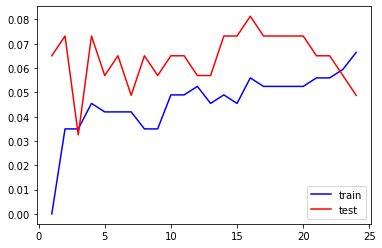

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
neighbors = range(1, 25,1)
errors_train = []
errors_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    errors_train.append(mean_squared_error(knn.predict(X_train), y_train))
    errors_test.append(mean_squared_error(knn.predict(X_test), y_test))
    pass
    
plt.plot(neighbors, errors_train, color='blue', label='train')
plt.plot(neighbors, errors_test, color='red', label='test')
plt.legend()

In [37]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(mean_squared_error(knn.predict(X_test), y_test))

0.032520325203252036


In [38]:
knn.score(X_test, y_test)

0.967479674796748

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
knn_cv = KNeighborsClassifier(n_neighbors=3)
for i in range(3,7):
    print(i,':')
    skf = StratifiedKFold(n_splits=i, shuffle=True, random_state=5)
    cv_scores = cross_val_score(knn_cv, X, y, cv=skf)
    print(cv_scores)
    print('cv_scores mean:{}'.format(np.mean(cv_scores)))

3 :
[0.90510949 0.90441176 0.86764706]
cv_scores mean:0.8923894375268356
4 :
[0.91262136 0.92156863 0.92156863 0.87254902]
cv_scores mean:0.9070769084332762
5 :
[0.91463415 0.92682927 0.86585366 0.85365854 0.87654321]
cv_scores mean:0.8875037639265282
6 :
[0.92753623 0.91176471 0.89705882 0.94117647 0.88235294 0.86764706]
cv_scores mean:0.9045893719806761


In [40]:
from sklearn.model_selection import GridSearchCV
knn_gr = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=5)
param_gridsearch = {'n_neighbors': np.arange(1,15),
                    'weights':['uniform','distance'],
                    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'metric':['canberra', 'chebyshev','hamming', 'jaccard','minkowski','manhattan'],
                    'leaf_size':list(range(10,50,10))
                   }
knn_gridsearch = GridSearchCV(knn_gr,param_gridsearch,cv=skf)
knn_gridsearch.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=5, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40],
                         'metric': ['canberra', 'chebyshev', 'hamming',
                                    'jaccard', 'minkowski', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']})

In [41]:
print("Best parameters: " + str(knn_gridsearch.best_params_))

Best parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}


In [42]:
print("Best score: "+ str(knn_gridsearch.best_score_))

Best score: 0.9546654929577465


In [43]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       114 non-null    int64  
 1   diagnosis                114 non-null    object 
 2   radius_mean              114 non-null    float64
 3   texture_mean             114 non-null    float64
 4   perimeter_mean           114 non-null    float64
 5   area_mean                114 non-null    float64
 6   smoothness_mean          114 non-null    float64
 7   compactness_mean         114 non-null    float64
 8   concavity_mean           114 non-null    float64
 9   concave points_mean      114 non-null    float64
 10  symmetry_mean            114 non-null    float64
 11  fractal_dimension_mean   114 non-null    float64
 12  radius_se                114 non-null    float64
 13  texture_se               114 non-null    float64
 14  perimeter_se             1

In [44]:
holdout = holdout.drop('id', 1)
holdout['diagnosis'] = holdout['diagnosis'].map({'M':1,'B':0})

In [45]:
X = holdout
y_holdout = holdout['diagnosis']

In [46]:
X = X.drop('radius_mean', 1)
X = X.drop('diagnosis', 1)
X = X.drop('texture_worst', 1)
X = X.drop('perimeter_mean', 1)
X = X.drop('perimeter_worst', 1)
X = X.drop('radius_worst', 1)
X = X.drop('area_worst', 1)
X = X.drop('perimeter_se', 1)
X = X.drop('radius_se', 1)
X = X.drop('concave points_worst', 1)
X = X.drop('texture_se', 1)
X = X.drop('area_se', 1)
X = X.drop('smoothness_se', 1)
X = X.drop('compactness_se', 1)
X = X.drop('concavity_se', 1)
X = X.drop('concave points_se', 1)
X = X.drop('symmetry_se', 1)
X = X.drop('smoothness_worst', 1)
X = X.drop('fractal_dimension_se', 1)
X = X.drop('compactness_worst', 1)
X = X.drop('concavity_worst', 1)
X = X.drop('symmetry_worst', 1)
X = X.drop('fractal_dimension_worst', 1)

In [47]:
# X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y, test_size=0.3, random_state=17, stratify = y) 

In [80]:
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import FunctionTransformer

pipeline = make_pipeline(StandardScaler())

In [81]:
X_new_tr = pipeline.fit_transform(X)

In [82]:
X_holdout = pd.DataFrame(X_new_tr,columns = X.columns)

In [83]:
from sklearn.metrics import roc_auc_score
knn = KNeighborsClassifier(algorithm= 'auto', metric= 'manhattan',leaf_size= 10, n_neighbors= 12, weights= 'distance')
knn.fit(X_train, y_train)
print(roc_auc_score(y_test,knn.predict(X_test)))

0.9391586674195369


In [84]:
from sklearn.metrics import roc_auc_score
knn = KNeighborsClassifier(algorithm= 'auto', metric= 'manhattan', leaf_size= 10, n_neighbors= 12, weights= 'distance')
knn.fit(X_train, y_train)
print(roc_auc_score(y_holdout,knn.predict(X_holdout)))

0.933531746031746


In [87]:
holdout_scores_knn,knn_train_scores, knn_test_scores=[],[],[]
n_neighbors_ = range(1, 25)
for k in tqdm(n_neighbors_):
    knn = KNeighborsClassifier(algorithm= 'auto', metric= 'manhattan', leaf_size= 10, n_neighbors= k, weights= 'distance')
    knn_train_scores.append(mean(cross_val_score(knn, X_train, y_train, cv=skf,scoring='roc_auc')))
    knn_test_scores.append(mean(cross_val_score(knn, X_test, y_test, cv=skf,scoring='roc_auc'))) 
    holdout_scores_knn.append(mean(cross_val_score(knn, X_holdout, y_holdout, cv=skf,scoring='roc_auc')))

100%|██████████| 24/24 [00:02<00:00,  8.99it/s]


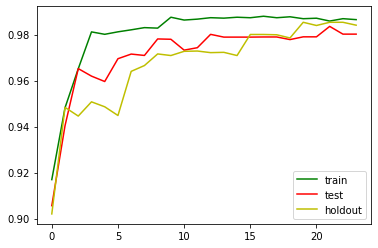

In [88]:
plot(knn_train_scores, color='green', label='train')
plot(knn_test_scores, color='red', label='test')
plot(holdout_scores_knn, color='y', label='holdout')
legend()

2.l_reg

In [89]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=5)
lr_cv = LogisticRegressionCV(cv = skf,scoring='roc_auc', random_state=17)
lr_cv.fit(X_train, y_train)
print(roc_auc_score(y_train,lr_cv.predict(X_train)))

0.9365112515010704


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

c_space = np.linspace(1e-2, 1, 50)
param_grid = {'C': c_space,'penalty':['l1', 'l2', 'elasticnet'],'solver':['newton-cg','lbfgs', 'liblinear', 'sag', 'saga'],'class_weight':['balanced','None'],'multi_class':['auto', 'ovr', 'multinomial'],}

lr = LogisticRegression()

lr_cv = GridSearchCV(lr, param_grid, cv=4)

lr_cv.fit(X_test, y_test)

print("Tuned Logistic Regression Parameters: {}".format(lr_cv.best_params_))
print("Best score is {}".format(lr_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.07061224489795918, 'class_weight': 'balanced', 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
Best score is 0.9508064516129032


In [91]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=5)
lr_cv = LogisticRegressionCV([0.07061224489795918],cv = skf,scoring='roc_auc', random_state=17, class_weight= 'balanced', multi_class= 'auto', penalty= 'l2', solver= 'newton-cg')
lr_cv.fit(X_train, y_train)
print(roc_auc_score(y_test,lr_cv.predict(X_test)))

0.9435347261434218


In [92]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=5)
lr_cv = LogisticRegressionCV([0.07061224489795918],cv = skf,scoring='roc_auc', random_state=17, class_weight= 'balanced', multi_class= 'auto', penalty= 'l2', solver= 'newton-cg')
lr_cv.fit(X_train, y_train)
print(roc_auc_score(y_holdout,lr_cv.predict(X_holdout)))

0.9196428571428572


In [93]:
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
holdout_scores_lr,lr_train_scores, lr_test_scores = [],[],[]
c_values = np.linspace(1e-3, 1, 10)
for c_val in tqdm(c_values):
    lr = LogisticRegression(C = c_val,  random_state=17, class_weight= 'balanced', multi_class= 'auto', penalty= 'l2', solver= 'newton-cg')
    lr_train_scores.append(mean(cross_val_score(lr, X_train, y_train, cv=skf,scoring='roc_auc')))
    lr_test_scores.append(mean(cross_val_score(lr, X_test, y_test, cv=skf,scoring='roc_auc'))) 
    holdout_scores_lr.append(mean(cross_val_score(lr, X_holdout, y_holdout, cv=skf,scoring='roc_auc')))

100%|██████████| 10/10 [00:01<00:00,  5.72it/s]


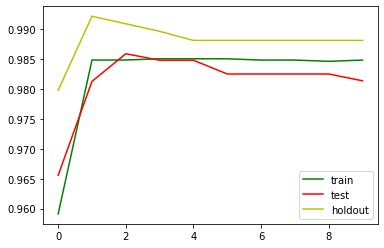

In [94]:
plot(lr_train_scores, color='green', label='train')
plot(lr_test_scores, color='red', label='test')
plot(holdout_scores_lr, color='y', label='holdout')
legend()

3.rforest

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
skf = StratifiedKFold(n_splits=4, shuffle=False, random_state=5)
rf = RandomForestClassifier(random_state= 42, n_jobs=-1)

parameters = {'n_estimators': range(5, 21), 
              'max_features': np.linspace(0.2,1.5),
              'max_depth': list(range(2,15)),
              'criterion': ['entropy', 'gini'],
              'min_samples_split': list(range(1,15)),
              'min_samples_leaf':list(range(1,15)),
              'class_weight':['balanced', 'balanced_subsample']
             }

# Run the grid search
rf_cv = RandomizedSearchCV(rf, parameters,verbose=1,n_jobs=-1,cv=skf,scoring='roc_auc')
rf_cv.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.3s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=5, shuffle=False),
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14],
                                        'max_features': array([0.2       , 0.22653061, 0.25306122, 0.27959...
       0.99591837, 1.02244898, 1.04897959, 1.0755102 , 1.10204082,
       1.12857143, 1.15510204, 1.18163265, 1.20816327, 1.23469388,
       1.26122449, 1.2877551 , 1.31428571, 1.34081633, 1.36734694,
       1.39387755, 1.42040816, 1.44693878, 1.47346939, 1.5       ]),
                                        'min_sample

In [96]:
rf_cv.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=11,
                       max_features=0.8367346938775511, min_samples_leaf=7,
                       min_samples_split=8, n_estimators=7, n_jobs=-1,
                       random_state=42)

In [97]:
rf_cv.best_score_

0.9807575397853175

In [98]:
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=5)
rf_cv = RandomForestClassifier(class_weight='balanced',criterion = 'entropy',random_state=42,n_estimators=10,min_samples_leaf=7,max_features=0.7 ,max_depth = 13, min_samples_split=9)
rf_cv.fit(X_train, y_train)
print(roc_auc_score(y_test,rf_cv.predict(X_test)))

0.9349237718802936


In [99]:
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=5)
rf_cv = RandomForestClassifier(class_weight='balanced',criterion = 'entropy',random_state=42,n_estimators=10,min_samples_leaf=7,max_features=0.7 ,max_depth = 13, min_samples_split=9)
rf_cv.fit(X_train, y_train)
print(roc_auc_score(y_holdout,rf_cv.predict(X_holdout)))

0.9295634920634921


In [100]:
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
holdout_scores_rf,rf_train_scores, rf_test_scores = [],[],[]
max_depth_ = range(2,21)
for dep in tqdm(max_depth_):
    rf = RandomForestClassifier(class_weight='balanced',criterion = 'entropy',random_state=42,n_estimators=10,min_samples_leaf=7,max_features=0.7 ,max_depth = dep, min_samples_split=9)
    rf_train_scores.append(mean(cross_val_score(rf, X_train, y_train, cv=skf,scoring='roc_auc')))
    rf_test_scores.append(mean(cross_val_score(rf, X_test, y_test, cv=skf,scoring='roc_auc'))) 
    holdout_scores_rf.append(mean(cross_val_score(rf, X_holdout, y_holdout, cv=skf,scoring='roc_auc')))

100%|██████████| 19/19 [00:04<00:00,  3.80it/s]


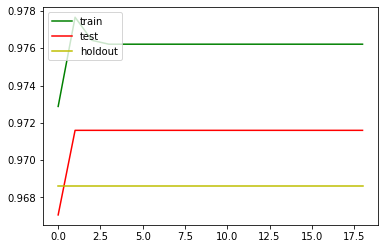

In [101]:
plot(rf_train_scores, color='green', label='train')
plot(rf_test_scores, color='red', label='test')
plot(holdout_scores_rf, color='y', label='holdout')
legend()

4.ensamble

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [50,100, 150, 180, 200,250,300],
    'criterion':['friedman_mse', 'mse', 'mae'],
    'subsample':np.linspace(0.2,1.5),
    'max_depth': list(range(2,8))
}

grid_search_gbc = RandomizedSearchCV(gbc, parameters, cv = skf, n_jobs = -1, verbose = 1,scoring='roc_auc')
grid_search_gbc.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.6s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=5, shuffle=True),
                   estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.001, 0.1, 1, 10],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [50, 100, 150, 180, 200,
                                                         250, 300],
                                        'subsample': array([0.2       , 0...
       0.73061224, 0.75714286, 0.78367347, 0.81020408, 0.83673469,
       0.86326531, 0.88979592, 0.91632653, 0.94285714, 0.96938776,
       0.99591837, 1.02244898, 1.04897959, 1.0755102 , 1.10204082,
       1.12857143, 1.15510204, 1.18163265, 1.20816327, 

In [103]:
grid_search_gbc.best_params_

{'subsample': 0.8102040816326532,
 'n_estimators': 100,
 'max_depth': 4,
 'loss': 'deviance',
 'learning_rate': 1,
 'criterion': 'friedman_mse'}

In [104]:
grid_search_gbc.best_score_

0.9803156205933983

In [110]:
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=5)
grid_search_gbc = GradientBoostingClassifier(subsample= 0.57,n_estimators= 180,loss= 'deviance',max_depth= 4,learning_rate= 0.1,criterion= 'mse')
grid_search_gbc.fit(X_train, y_train)
print(roc_auc_score(y_test,grid_search_gbc.predict(X_test)))

0.9565217391304348


In [111]:
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=5)
grid_search_gbc = GradientBoostingClassifier(subsample= 0.57,n_estimators= 180,loss= 'deviance',max_depth= 4,learning_rate= 0.1,criterion= 'mse')
grid_search_gbc.fit(X_train, y_train)
print(roc_auc_score(y_holdout,grid_search_gbc.predict(X_holdout)))

0.9107142857142856


In [107]:
from tqdm import tqdm
from sklearn.ensemble import GradientBoostingClassifier
holdout_scores_gb,gb_train_scores, gb_test_scores = [],[],[]
max_depth_ = range(2,21)
for dep in tqdm(max_depth_):
    gb = GradientBoostingClassifier(subsample= 0.57,n_estimators= 180,loss= 'deviance',max_depth= dep,learning_rate= 0.1,criterion= 'mse')
    gb_train_scores.append(mean(cross_val_score(gb, X_train, y_train, cv=skf,scoring='roc_auc')))
    gb_test_scores.append(mean(cross_val_score(gb, X_test, y_test, cv=skf,scoring='roc_auc'))) 
    holdout_scores_gb.append(mean(cross_val_score(gb, X_holdout, y_holdout, cv=skf,scoring='roc_auc')))

100%|██████████| 19/19 [01:01<00:00,  3.26s/it]


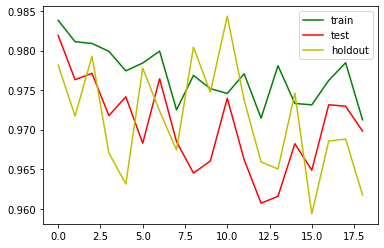

In [108]:
plot(gb_train_scores, color='green', label='train')
plot(gb_test_scores, color='red', label='test')
plot(holdout_scores_gb, color='y', label='holdout')
legend()

Часть 3. Сравнение моделей

knn

In [145]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import time
knn = KNeighborsClassifier(algorithm= 'auto', metric= 'manhattan',leaf_size= 10, n_neighbors= 12, weights= 'distance')
knn.fit(X_train, y_train)
start_time = time.time()
knn_pred = knn.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
knn_score = roc_auc_score(y_test,knn_pred)
knn_acc = accuracy_score(y_test,knn_pred)
print(knn_score)

--- 0.008841514587402344 seconds ---
0.9391586674195369


In [146]:
from sklearn.metrics import roc_auc_score
knn = KNeighborsClassifier(algorithm= 'auto', metric= 'manhattan', leaf_size= 10, n_neighbors= 12, weights= 'distance')
knn.fit(X_train, y_train)
start_time = time.time()
knn_pred = knn.predict(X_holdout)
print("--- %s seconds ---" % (time.time() - start_time))
knn_score_h = roc_auc_score(y_holdout,knn_pred)
knn_acc_h = accuracy_score(y_holdout,knn_pred)
print(knn_score_h)

--- 0.00554966926574707 seconds ---
0.933531746031746


lr

In [149]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=5)
lr_cv = LogisticRegressionCV([0.07061224489795918],cv = skf,scoring='roc_auc', random_state=17, class_weight= 'balanced', multi_class= 'auto', penalty= 'l2', solver= 'newton-cg')
lr_cv.fit(X_train, y_train)
start_time = time.time()
lr_pred = lr_cv.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
lr_score = roc_auc_score(y_test,lr_pred)
lr_acc = accuracy_score(y_test,lr_pred)
print(lr_score)

--- 0.0021524429321289062 seconds ---
0.9435347261434218


In [148]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=5)
lr_cv = LogisticRegressionCV([0.07061224489795918],cv = skf,scoring='roc_auc', random_state=17, class_weight= 'balanced', multi_class= 'auto', penalty= 'l2', solver= 'newton-cg')
lr_cv.fit(X_train, y_train)
start_time = time.time()
lr_pred = lr_cv.predict(X_holdout)
print("--- %s seconds ---" % (time.time() - start_time))
lr_score_h = roc_auc_score(y_holdout,lr_pred)
lr_acc_h = accuracy_score(y_holdout,lr_pred)
print(lr_score_h)

--- 0.0038917064666748047 seconds ---
0.9196428571428572


rf

In [150]:
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=5)
rf_cv = RandomForestClassifier(class_weight='balanced',criterion = 'entropy',random_state=42,n_estimators=10,min_samples_leaf=7,max_features=0.7 ,max_depth = 13, min_samples_split=9)
rf_cv.fit(X_train, y_train)
start_time = time.time()
rf_pred = rf_cv.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
rf_score = roc_auc_score(y_test,rf_pred)
rf_acc = accuracy_score(y_test,rf_pred)
print(rf_score)

--- 0.0044476985931396484 seconds ---
0.9349237718802936


In [151]:
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=5)
rf_cv = RandomForestClassifier(class_weight='balanced',criterion = 'entropy',random_state=42,n_estimators=10,min_samples_leaf=7,max_features=0.7 ,max_depth = 13, min_samples_split=9)
rf_cv.fit(X_train, y_train)
start_time = time.time()
rf_pred = rf_cv.predict(X_holdout)
print("--- %s seconds ---" % (time.time() - start_time))
rf_score_h = roc_auc_score(y_holdout,rf_pred)
rf_acc_h = accuracy_score(y_holdout,rf_pred)
print(rf_score_h)

--- 0.0038144588470458984 seconds ---
0.9295634920634921


gb

In [153]:
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=5)
grid_search_gbc = GradientBoostingClassifier(subsample= 0.57,n_estimators= 180,loss= 'deviance',max_depth= 4,learning_rate= 0.1,criterion= 'mse')
grid_search_gbc.fit(X_train, y_train)
start_time = time.time()
gb_pred = grid_search_gbc.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
gb_score = roc_auc_score(y_test,gb_pred)
gb_acc = accuracy_score(y_test,gb_pred)
print(gb_score)

--- 0.004056453704833984 seconds ---
0.9673913043478262


In [165]:
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=5)
grid_search_gbc = GradientBoostingClassifier(subsample= 0.57,n_estimators= 180,loss= 'deviance',max_depth= 4,learning_rate= 0.1,criterion= 'mse')
grid_search_gbc.fit(X_train, y_train)
start_time = time.time()
gb_pred = grid_search_gbc.predict(X_holdout)
print("--- %s seconds ---" % (time.time() - start_time))
gb_score_h = roc_auc_score(y_holdout,gb_pred)
gb_acc_h = accuracy_score(y_holdout,gb_pred)
print(gb_score_h)

--- 0.007064104080200195 seconds ---
0.9295634920634921


comparison

In [141]:
models = pd.DataFrame({
    'Model': ['K - Nearest Neighbors','Logistic Regression','Random Forest', 'Gradient Boosting'],
    'Score': [knn_score, lr_score, rf_score, gb_score]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Gradient Boosting,0.967391
1,Logistic Regression,0.943535
0,K - Nearest Neighbors,0.939159
2,Random Forest,0.934924


In [142]:
models = pd.DataFrame({
    'Model': ['K - Nearest Neighbors','Logistic Regression','Random Forest', 'Gradient Boosting'],
    'Score': [knn_score_h, lr_score_h, rf_score_h, gb_score_h]})

models.sort_values(by='Score', ascending=False)

,Model,Score
0,K - Nearest Neighbors,0.933532
2,Random Forest,0.929563
3,Gradient Boosting,0.924603
1,Logistic Regression,0.919643


acccuracy

In [143]:
models = pd.DataFrame({
    'Model': ['K - Nearest Neighbors','Logistic Regression','Random Forest', 'Gradient Boosting'],
    'Score': [knn_acc, lr_acc, rf_acc, gb_acc]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Gradient Boosting,0.975610
0,K - Nearest Neighbors,0.951220
1,Logistic Regression,0.951220
2,Random Forest,0.934959


In [144]:
models = pd.DataFrame({
    'Model': ['K - Nearest Neighbors','Logistic Regression','Random Forest', 'Gradient Boosting'],
    'Score': [knn_acc_h, lr_acc_h, rf_acc_h, gb_acc_h]})

models.sort_values(by='Score', ascending=False)

,Model,Score
0,K - Nearest Neighbors,0.947368
1,Logistic Regression,0.929825
2,Random Forest,0.929825
3,Gradient Boosting,0.929825
